# STEP 1 & 2 
-Import dataset by sql query file to your local computer and create connection between your sql and  python  
-Import library needed ( pandas, matplotlib, and seaborn)

In [50]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
df_products = pd.read_csv('olist_products.csv')
df_order_items = pd.read_csv('olist_order_items.csv')
df_sellers = pd.read_csv('olist_sellers.csv')
df_order_customers = pd.read_csv('olist_customers.csv')
df_orders_dataset = pd.read_csv('olist_orders.csv')
df_order_reviews = pd.read_csv('olist_order_reviews.csv')
df_order_payments = pd.read_csv('olist_order_payments.csv') 
df_geolocation = pd.read_csv('olist_geolocation.csv') 
df_product_category_name_translation = pd.read_csv('product_category_name_translation.csv') 

### Catatan

# STEP 3: Merge the dataset using their key connection based on dataset framework above

In [52]:
# Merge dataset
df_order_items_and_products = pd.merge(df_order_items, df_products,  on='product_id')
df_order_items_products_seller = pd.merge(df_order_items_and_products, df_sellers,  on='seller_id')
df_order_items_products_seller_orders_dataset = pd.merge(df_order_items_products_seller, df_orders_dataset,  on='order_id')
df_order_items_products_seller_orders_dataset_customer = pd.merge(df_order_items_products_seller_orders_dataset, df_order_customers, on='customer_id')
df_order_items_products_seller_orders_dataset_customer_review = pd.merge(df_order_items_products_seller_orders_dataset_customer, df_order_reviews,  on='order_id')
df_olist = pd.merge(df_order_items_products_seller_orders_dataset_customer_review, df_order_payments, on='order_id')
df_olist.shape

(117329, 39)

In [53]:
# Convert date type (object) to datetime
df_olist['order_purchase_timestamp'] = pd.to_datetime(df_olist['order_purchase_timestamp'])
df_olist['order_approved_at'] = pd.to_datetime(df_olist['order_approved_at'])
df_olist['order_delivered_carrier_date'] = pd.to_datetime(df_olist['order_delivered_carrier_date'])
df_olist['order_delivered_customer_date'] = pd.to_datetime(df_olist['order_delivered_customer_date'])
df_olist['order_estimated_delivery_date'] = pd.to_datetime(df_olist['order_estimated_delivery_date'])
df_olist['review_creation_date'] = pd.to_datetime(df_olist['review_creation_date'])
df_olist['review_answer_timestamp'] = pd.to_datetime(df_olist['review_answer_timestamp'])
df_olist['shipping_limit_date'] = pd.to_datetime(df_olist['shipping_limit_date'])
df_olist.dtypes

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
seller_zip_code_prefix                    int64
seller_city                              object
seller_state                             object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetim

# STEP 4: Deal Null Values

In [54]:
#Count missing value
df_count_missing = df_olist.isnull().sum()
df_percentage_missing = 100*df_olist.isnull().sum() / len(df_olist)

df_count_missing = pd.concat([df_count_missing,df_percentage_missing],axis=1)
df_count_missing 

#rename column
rename_df_count_missing = df_count_missing.rename(
    columns = {0 : 'missing_values', 1 : 'percentage_missing_values'})

rename_df_count_missing

,missing_values,percentage_missing_values
order_id,0,0.000000
order_item_id,0,0.000000
product_id,0,0.000000
seller_id,0,0.000000
shipping_limit_date,0,0.000000
price,0,0.000000
freight_value,0,0.000000
product_category_name,1695,1.444656
product_name_lenght,1695,1.444656
product_description_lenght,1695,1.444656


In [55]:
#Check Duplicated Value
duplicated_value = df_olist[df_olist.duplicated(keep=False)]
duplicated_value

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value


# STEP 5: Add columns 

In [56]:
date_col = pd.DatetimeIndex(df_olist['order_purchase_timestamp'])
df_olist['year'] = date_col.year 
df_olist['month'] = date_col.month 
df_olist['day'] = date_col.day 
df_olist['hour'] = date_col.hour

df_olist.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,year,month,day,hour
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,2017-09-21,2017-09-22 10:57:03,1,credit_card,2,72.19,2017,9,13,8
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,2017-07-14,2017-07-17 12:50:07,1,boleto,1,73.86,2017,6,28,11
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,2018-06-05,2018-06-06 21:41:12,1,credit_card,2,83.23,2018,5,18,10
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,2017-08-10,2017-08-13 03:35:17,1,credit_card,3,75.07,2017,8,1,18
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,2017-08-25,2017-08-28 00:51:18,1,credit_card,4,72.19,2017,8,10,21


In [57]:
#a. Total price value
df_olist['total_price_value'] = df_olist['price'] * df_olist['order_item_id']
df_olist['total_price_value'].sort_values(ascending = False)

88790     13440.00
88789     11760.00
88788     10080.00
88787      8400.00
88797      7160.00
            ...   
115544        2.20
24555         1.70
43092         1.20
102949        0.85
102950        0.85
Name: total_price_value, Length: 117329, dtype: float64

In [58]:
#b. Total freight value
df_olist['total_freight_value'] = df_olist['freight_value'] * df_olist['order_item_id']
df_olist['total_freight_value'].sort_values(ascending = False)

48894    1794.96
48893    1495.80
48892    1196.64
93352    1002.30
48891     897.48
          ...   
30718       0.00
22905       0.00
6903        0.00
22907       0.00
6842        0.00
Name: total_freight_value, Length: 117329, dtype: float64

In [59]:
#c. Total order value (total price + total freight)
df_olist['total_order_value'] = df_olist['total_price_value'] + df_olist['total_freight_value']
df_olist['total_order_value'].sort_values(ascending = False)

88790     13664.08
88789     11956.07
88788     10248.06
88787      8540.05
88797      7274.88
            ...   
115544        9.59
57075         9.56
43092         9.09
57062         7.28
8293          6.08
Name: total_order_value, Length: 117329, dtype: float64

# STEP 6: Customer Demographic

In [60]:
#rename column
df_olist.rename(columns={
    'customer_state' : 'customer_adress_static',
    'customer_city' : 'customer_adress_city',
},inplace=True)

#check name column
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   order_item_id                  117329 non-null  int64         
 2   product_id                     117329 non-null  object        
 3   seller_id                      117329 non-null  object        
 4   shipping_limit_date            117329 non-null  datetime64[ns]
 5   price                          117329 non-null  float64       
 6   freight_value                  117329 non-null  float64       
 7   product_category_name          115634 non-null  object        
 8   product_name_lenght            115634 non-null  float64       
 9   product_description_lenght     115634 non-null  float64       
 10  product_photos_qty             115634 non-null  float64       
 11  

In [64]:
#Grouping to calculate top most 5
df_uniqe_customer = df_olist.groupby(['customer_adress_city'])['customer_unique_id'].nunique().nlargest(5).sort_values(ascending = False)
df_uniqe_customer

customer_adress_city
sao paulo         14759
rio de janeiro     6500
belo horizonte     2637
brasilia           2046
curitiba           1447
Name: customer_unique_id, dtype: int64

<Axes: xlabel='customer_adress_city'>

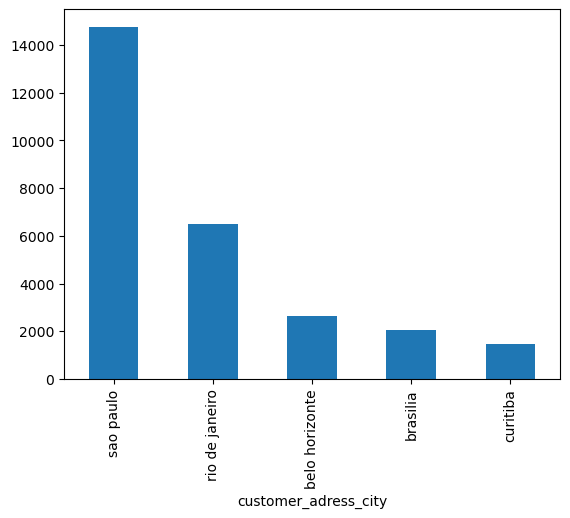

In [65]:
#visualization
df_uniqe_customer.plot(kind='bar')

In [66]:
#Count order id each 
df_frequency = df_olist.groupby('customer_id').agg({'order_id':'nunique'})
df_frequency

,order_id
customer_id,
00012a2ce6f8dcda20d059ce98491703,1
000161a058600d5901f007fab4c27140,1
0001fd6190edaaf884bcaf3d49edf079,1
0002414f95344307404f0ace7a26f1d5,1
000379cdec625522490c315e70c7a9fb,1
...,...
fffcb937e9dd47a13f05ecb8290f4d3e,1
fffecc9f79fd8c764f843e9951b11341,1
fffeda5b6d849fbd39689bb92087f431,1


In [67]:
#Total order per category
df_frequency['F_score'] = pd.cut(df_frequency['order_id'],bins=[0,5,np.Inf],labels=['little','lot'],right=True)
df_frequency['F_score'].value_counts()

little    97916
lot           0
Name: F_score, dtype: int64

In [68]:
#Minimum and maximum order per category
df_min_max = df_frequency.groupby('F_score').agg({'order_id':['min','max','mean','median','count']})
df_min_max

order_id                        
             min  max mean median  count
F_score                                 
little       1.0  1.0  1.0    1.0  97916
lot          NaN  NaN  NaN    NaN      0

In [69]:
df_customers_category = pd.concat([df_frequency],axis=1)
df_customers_category

,order_id,F_score
customer_id,,
00012a2ce6f8dcda20d059ce98491703,1,little
000161a058600d5901f007fab4c27140,1,little
0001fd6190edaaf884bcaf3d49edf079,1,little
0002414f95344307404f0ace7a26f1d5,1,little
000379cdec625522490c315e70c7a9fb,1,little
...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,1,little
fffecc9f79fd8c764f843e9951b11341,1,little
fffeda5b6d849fbd39689bb92087f431,1,little


In [70]:
#First and last purchase date
pd.to_datetime(df_olist['order_purchase_timestamp'])
date_transaction = df_olist.sort_values('order_purchase_timestamp').groupby('customer_id')['order_purchase_timestamp'].agg(['first','last']).rename(columns={'first':'first_purchase_date', 'last':'last_purchase_date'})
date_transaction

,first_purchase_date,last_purchase_date
customer_id,,
00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,2017-11-14 16:08:26
000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,2017-07-16 09:40:32
0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,2017-02-28 11:06:43
0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,2017-08-16 13:09:20
000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,2018-04-02 13:42:17
...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,2018-03-17 00:55:27
fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,2018-03-29 16:59:26
fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,2018-05-22 13:36:02


In [71]:
#First and last purchase order
order_time = df_olist.sort_values('order_item_id').groupby('customer_id')['order_item_id'].agg(['first','last']).rename(columns={'first':'first_purchase_order', 'last':'last_purchase_order'})
order_time 

,first_purchase_order,last_purchase_order
customer_id,,
00012a2ce6f8dcda20d059ce98491703,1,1
000161a058600d5901f007fab4c27140,1,1
0001fd6190edaaf884bcaf3d49edf079,1,1
0002414f95344307404f0ace7a26f1d5,1,1
000379cdec625522490c315e70c7a9fb,1,1
...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,1,1
fffecc9f79fd8c764f843e9951b11341,1,1
fffeda5b6d849fbd39689bb92087f431,1,1


In [72]:
total_order = order_time['first_purchase_order'] + order_time['last_purchase_order']
total_order

customer_id
00012a2ce6f8dcda20d059ce98491703    2
000161a058600d5901f007fab4c27140    2
0001fd6190edaaf884bcaf3d49edf079    2
0002414f95344307404f0ace7a26f1d5    2
000379cdec625522490c315e70c7a9fb    2
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    2
fffecc9f79fd8c764f843e9951b11341    2
fffeda5b6d849fbd39689bb92087f431    2
ffff42319e9b2d713724ae527742af25    2
ffffa3172527f765de70084a7e53aae8    3
Length: 97916, dtype: int64

In [73]:
df_purchase_total = pd.concat([date_transaction,order_time,total_order],axis=1)
df_purchase_total.rename(columns={df_purchase_total.columns[4]: 'total_order'},inplace=True)
df_purchase_total

,first_purchase_date,last_purchase_date,first_purchase_order,last_purchase_order,total_order
customer_id,,,,,
00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,2017-11-14 16:08:26,1,1,2
000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,2017-07-16 09:40:32,1,1,2
0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,2017-02-28 11:06:43,1,1,2
0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,2017-08-16 13:09:20,1,1,2
000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,2018-04-02 13:42:17,1,1,2
...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,2018-03-17 00:55:27,1,1,2
fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,2018-03-29 16:59:26,1,1,2
fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,2018-05-22 13:36:02,1,1,2


# STEP 7: Order Behaviour 

In [74]:
#Count each customer uniqe
count_customer_unique = df_olist.groupby('customer_unique_id').agg({'order_id':'nunique'})
count_customer_unique

,order_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [75]:
#Count total customer uniqe
count_customer_unique['F_score'] = pd.cut(count_customer_unique['order_id'],bins=[0,5,np.Inf],labels=['little','lot'],right=True)
count_customer_unique['F_score'].value_counts()

little    94710
lot          10
Name: F_score, dtype: int64

In [76]:
#Order min and max customer uniqe
df_count_each_customer = count_customer_unique.groupby('F_score').agg({'order_id':['min','max','mean','median','count']})
df_count_each_customer

order_id                            
             min max      mean median  count
F_score                                     
little         1   5  1.033048    1.0  94710
lot            6  16  7.600000    6.5     10

In [77]:
#Category per customer uniqe
df_category_customer_unique = pd.concat([count_customer_unique],axis=1)
df_category_customer_unique

,order_id,F_score
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1,little
0000b849f77a49e4a4ce2b2a4ca5be3f,1,little
0000f46a3911fa3c0805444483337064,1,little
0000f6ccb0745a6a4b88665a16c9f078,1,little
0004aac84e0df4da2b147fca70cf8255,1,little
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,little
fffea47cd6d3cc0a88bd621562a9d061,1,little
ffff371b4d645b6ecea244b27531430a,1,little


In [78]:
#Mean product weight
mean_product_weight_g = df_olist['product_weight_g'].mean()
mean_product_weight_g

2110.7630616576735

In [79]:
#Standard deviation
df_standard_deviation = print(np.std(df_olist['product_weight_g']))
df_standard_deviation

3785.112797662112


In [82]:
#Calculation order based on month
df_order_month = df_olist.groupby('month')['order_id'].count()
df_order_month

month
1      9534
2     10002
3     11692
4     11043
5     12585
6     11149
7     12148
8     12597
9      5100
10     5943
11     9014
12     6522
Name: order_id, dtype: int64

In [83]:
#Calculation order based on day
df_order_day= df_olist.groupby('day')['order_id'].count()
df_order_day

day
1     3662
2     3800
3     3770
4     4000
5     4104
6     4062
7     3965
8     3957
9     3815
10    3679
11    3854
12    3797
13    3875
14    3933
15    4136
16    4253
17    3771
18    4067
19    4010
20    3888
21    3626
22    3822
23    3745
24    4559
25    3931
26    3960
27    3776
28    3525
29    3059
30    2968
31    1960
Name: order_id, dtype: int64

In [84]:
#Calculation order based on hour
df_order_hour = df_olist.groupby('hour')['order_id'].count()
df_order_hour

hour
0     2882
1     1333
2      605
3      316
4      254
5      224
6      569
7     1416
8     3507
9     5613
10    7318
11    7757
12    7165
13    7674
14    7894
15    7592
16    7954
17    7249
18    6848
19    6949
20    7206
21    7225
22    6917
23    4862
Name: order_id, dtype: int64

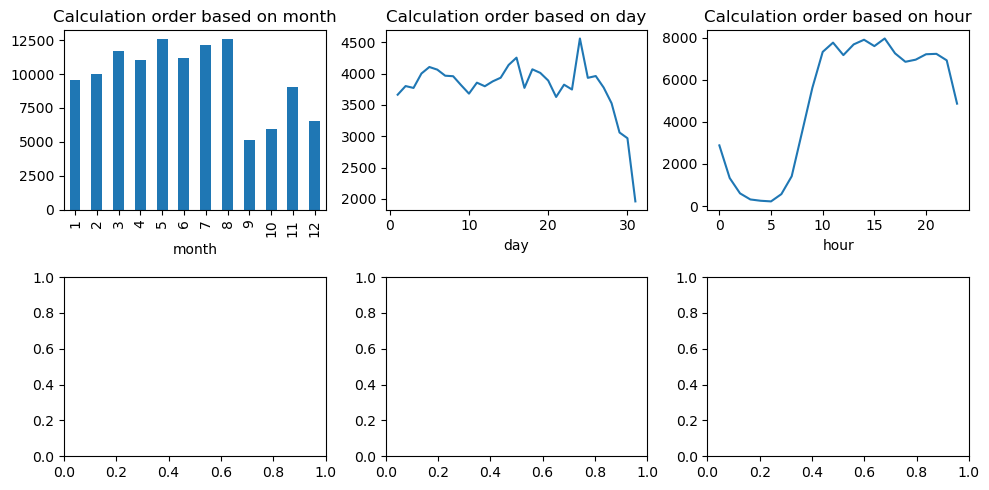

In [81]:
#Visualization calculation order based on month, day, and hour

fig,ax_subplot = plt.subplots(2,3,figsize=(10,5))

df_order_month.plot(x='month',y='order_id',kind='bar',ax=ax_subplot[0,0])
df_order_day.plot(x='day',y='order_id',kind='line',ax=ax_subplot[0,1])
df_order_hour.plot(x='hour',y='order_id',kind='line',ax=ax_subplot[0,2])

#MAdd description
ax_subplot[0,0].set_title('Calculation order based on month')
ax_subplot[0,1].set_title('Calculation order based on day')
ax_subplot[0,2].set_title('Calculation order based on hour')

#Agar tidak saling menempel teksnya
plt.tight_layout()

In [85]:
#Total order value each customers
df_volume_price = df_olist.groupby('customer_id').agg({'total_order_value':'sum'})
df_volume_price

,total_order_value
customer_id,
00012a2ce6f8dcda20d059ce98491703,114.74
000161a058600d5901f007fab4c27140,67.41
0001fd6190edaaf884bcaf3d49edf079,195.42
0002414f95344307404f0ace7a26f1d5,179.35
000379cdec625522490c315e70c7a9fb,107.01
...,...
fffcb937e9dd47a13f05ecb8290f4d3e,91.91
fffecc9f79fd8c764f843e9951b11341,244.08
fffeda5b6d849fbd39689bb92087f431,63.13


In [86]:
#Total order value all customers per category
df_volume_price['V_score'] = pd.cut(df_volume_price['total_order_value'],bins=[0,1000,2500,np.Inf],labels=['cheap','normal','expensive'],right=True)
df_volume_price['V_score'].value_counts()

cheap        96010
normal        1607
expensive      299
Name: V_score, dtype: int64

In [87]:
#Minimum and maximum order per category
df_volume_price.groupby('V_score').agg({'total_order_value':['min','max','mean','median','count']})

total_order_value                                        
                        min       max         mean    median  count
V_score                                                            
cheap                 10.07    998.58   156.317935   108.625  96010
normal              1000.08   2499.20  1464.344026  1351.480   1607
expensive           2501.62  61488.36  4669.022308  3495.800    299

In [88]:
#Category each customers 
score_customer = pd.concat([df_volume_price['V_score']],axis=1)
score_customer

,V_score
customer_id,
00012a2ce6f8dcda20d059ce98491703,cheap
000161a058600d5901f007fab4c27140,cheap
0001fd6190edaaf884bcaf3d49edf079,cheap
0002414f95344307404f0ace7a26f1d5,cheap
000379cdec625522490c315e70c7a9fb,cheap
...,...
fffcb937e9dd47a13f05ecb8290f4d3e,cheap
fffecc9f79fd8c764f843e9951b11341,cheap
fffeda5b6d849fbd39689bb92087f431,cheap


In [95]:
#Total payment popular methods
populer_payment = df_olist.payment_type.value_counts()
populer_payment

credit_card    86520
boleto         22835
voucher         6282
debit_card      1692
Name: payment_type, dtype: int64

In [112]:
#Count percentage review score customer
count_percentage_populer_payment = df_olist['payment_type'].value_counts(normalize=True).round(2)
count_percentage_populer_payment

credit_card    0.74
boleto         0.19
voucher        0.05
debit_card     0.01
Name: payment_type, dtype: float64

In [93]:
#Total product category most top 5
total_product_category = df_olist["product_category_name"].value_counts().sort_values(ascending=False).nlargest(5)
total_product_category

cama_mesa_banho           11847
beleza_saude               9944
esporte_lazer              8942
moveis_decoracao           8743
informatica_acessorios     8105
Name: product_category_name, dtype: int64

In [92]:
#Total product category lowest
total_product_category = df_olist["product_category_name"].value_counts().sort_values(ascending=True)
total_product_category

seguros_e_servicos                                   2
fashion_roupa_infanto_juvenil                        8
pc_gamer                                            10
cds_dvds_musicais                                   14
portateis_cozinha_e_preparadores_de_alimentos       15
                                                 ...  
informatica_acessorios                            8105
moveis_decoracao                                  8743
esporte_lazer                                     8942
beleza_saude                                      9944
cama_mesa_banho                                  11847
Name: product_category_name, Length: 73, dtype: int64

In [96]:
#Preference of each customers product category
df_preference_product = df_olist.groupby(["customer_id", "product_category_name"])["product_category_name"].count().sort_values(ascending=False)
df_preference_product

customer_id                       product_category_name 
270c23a11d024a44c896d1894b261a83  cama_mesa_banho           42
13aa59158da63ba0e93ec6ac2c07aacb  moveis_escritorio         38
9af2372a1e49340278e7c1ef8d749f34  ferramentas_jardim        29
92cd3ec6e2d643d4ebd0e3d6238f69e2  cama_mesa_banho           26
2ba91e12e5e4c9f56b82b86d9031d329  perfumaria                24
                                                            ..
5b3b4e44b50bdde1b3454ac5d970205a  livros_interesse_geral     1
5b3b036e81719243b67c993b4fc7ef37  alimentos                  1
5b39c82ffd108c049f679ceed482f7e2  moveis_decoracao           1
                                  cama_mesa_banho            1
7ff9db4f2c30ad9517c3540905c3203f  papelaria                  1
Name: product_category_name, Length: 97275, dtype: int64

In [97]:
# 1. most category product 2016
df_most_category_2016 = df_olist[df_olist['year']==2016]
df_most_category_2016 = df_most_category_2016.groupby('product_category_name')['customer_id'].count().sort_values(ascending=False).nlargest(5)

# 2. most category product 2017
df_most_category_2017 = df_olist[df_olist['year']==2017]
df_most_category_2017 = df_most_category_2017.groupby('product_category_name')['customer_id'].count().sort_values(ascending=False).nlargest(5)

# 3. most category product  2018
df_most_category_2018 = df_olist[df_olist['year']==2018]
df_most_category_2018 = df_most_category_2018.groupby('product_category_name')['customer_id'].count().sort_values(ascending=False).nlargest(5)

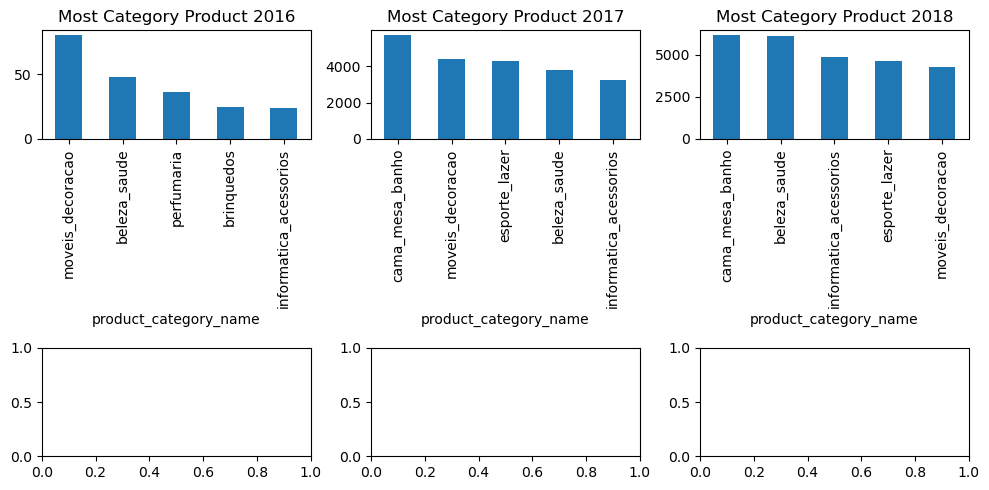

In [98]:
#Visualization  most category product 2016, 2017, and 2018

fig,ax_subplot = plt.subplots(2,3,figsize=(10,5))

df_most_category_2016.plot(x='product_category_name',y='customer_id',kind='bar',ax=ax_subplot[0,0])
df_most_category_2017.plot(x='product_category_name',y='customer_id',kind='bar',ax=ax_subplot[0,1])
df_most_category_2018.plot(x='product_category_name',y='customer_id',kind='bar',ax=ax_subplot[0,2])
#df_top_cagar_alam.plot(x='city',y='user_id',kind='bar',ax=ax_subplot[1,1])
#df_top_tempat_ibadah.plot(x='city',y='user_id',kind='bar',ax=ax_subplot[1,2])

#MAdd description
ax_subplot[0,0].set_title('Most Category Product 2016')
ax_subplot[0,1].set_title('Most Category Product 2017')
ax_subplot[0,2].set_title('Most Category Product 2018')

#Agar tidak saling menempel teksnya
plt.tight_layout()

# STEP 8: Review Customer

In [99]:
#Average all customer review score
average_total_review_score = df_olist["review_score"].mean().round(1)
average_total_review_score

4.0

In [100]:
#Count number review score customer
df_olist.loc[df_olist['review_score'] < 4, 'category'] = 'tidak_puas'
df_olist.loc[df_olist['review_score'] >= 4, 'category'] = 'puas'
count_review_score_customer = df_olist['category'].value_counts()

#Count percentage review score customer
count_percentage_review_score = df_olist['category'].value_counts(normalize=True)

review_score = pd.concat([count_review_score_customer,count_percentage_review_score],axis=1)
review_score

,category,category
puas,88550,0.754715
tidak_puas,28779,0.245285


In [101]:
#Count customer fill review
df_fills_review_title_message = df_olist.groupby('customer_id')['review_comment_title','review_comment_message'].count()
df_fills_review_title_message

C:\Users\User\AppData\Local\Temp\ipykernel_3768\4030352658.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_fills_review_title_message = df_olist.groupby('customer_id')['review_comment_title','review_comment_message'].count()


,review_comment_title,review_comment_message
customer_id,,
00012a2ce6f8dcda20d059ce98491703,0,1
000161a058600d5901f007fab4c27140,0,0
0001fd6190edaaf884bcaf3d49edf079,0,1
0002414f95344307404f0ace7a26f1d5,0,0
000379cdec625522490c315e70c7a9fb,0,0
...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,0,1
fffecc9f79fd8c764f843e9951b11341,0,0
fffeda5b6d849fbd39689bb92087f431,0,0


In [103]:
#Total customer fill review
df_total_review = df_fills_review_title_message['review_comment_title'] + df_fills_review_title_message['review_comment_message']
df_total_review

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    0
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    0
000379cdec625522490c315e70c7a9fb    0
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    1
fffecc9f79fd8c764f843e9951b11341    0
fffeda5b6d849fbd39689bb92087f431    0
ffff42319e9b2d713724ae527742af25    2
ffffa3172527f765de70084a7e53aae8    0
Length: 97916, dtype: int64

In [104]:
#Table concat review
df_review_customer_comment = pd.concat([df_fills_review_title_message,df_total_review],axis=1)
df_review_customer_comment.rename(columns={df_review_customer_comment.columns[2]: 'total_review'},inplace=True)
df_review_customer_comment

,review_comment_title,review_comment_message,total_review
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,0,1,1
000161a058600d5901f007fab4c27140,0,0,0
0001fd6190edaaf884bcaf3d49edf079,0,1,1
0002414f95344307404f0ace7a26f1d5,0,0,0
000379cdec625522490c315e70c7a9fb,0,0,0
...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,0,1,1
fffecc9f79fd8c764f843e9951b11341,0,0,0
fffeda5b6d849fbd39689bb92087f431,0,0,0


In [105]:
#Total order each customers
total_order_each_customer = df_olist.groupby('customer_id')['order_id'].count()
total_order_each_customer

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    1
fffecc9f79fd8c764f843e9951b11341    3
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    2
Name: order_id, Length: 97916, dtype: int64

In [106]:
#Rasio review and order each customers
df_rasio = pd.concat([df_review_customer_comment,total_order_each_customer],axis=1)
df_rasio.rename(columns={df_rasio.columns[3]: 'total_order'},inplace=True)
df_rasio

,review_comment_title,review_comment_message,total_review,total_order
customer_id,,,,
00012a2ce6f8dcda20d059ce98491703,0,1,1,1
000161a058600d5901f007fab4c27140,0,0,0,1
0001fd6190edaaf884bcaf3d49edf079,0,1,1,1
0002414f95344307404f0ace7a26f1d5,0,0,0,1
000379cdec625522490c315e70c7a9fb,0,0,0,1
...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,0,1,1,1
fffecc9f79fd8c764f843e9951b11341,0,0,0,3
fffeda5b6d849fbd39689bb92087f431,0,0,0,1


# 9: Time Series Analysis

In [107]:
#Totaling the sales of each item per day
df_total_sales_item_per_day = df_olist.groupby(["order_purchase_timestamp"])["order_item_id"].sum()
df_total_sales_item_per_day

order_purchase_timestamp
2016-09-04 21:15:19    3
2016-09-05 00:15:34    1
2016-10-02 22:07:52    1
2016-10-03 09:44:50    1
2016-10-03 16:56:50    1
                      ..
2018-08-29 14:18:23    3
2018-08-29 14:18:28    1
2018-08-29 14:52:00    1
2018-08-29 15:00:37    1
2018-09-03 09:06:57    1
Name: order_item_id, Length: 97370, dtype: int64

<Axes: xlabel='order_purchase_timestamp'>

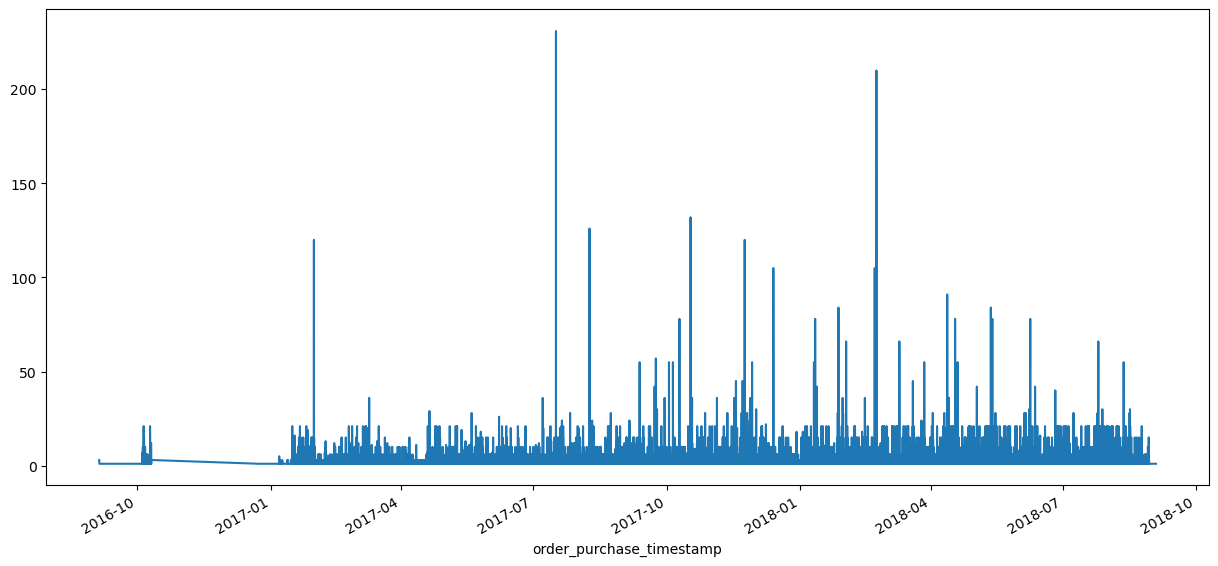

In [108]:
#Visualization
df_total_sales_item_per_day.plot(figsize=(15,7))

In [109]:
#Orders per day monday to sunday
df_olist['day_name'] = df_olist['order_purchase_timestamp'].dt.day_name()
df_day_order = df_olist.groupby('day_name')['order_id'].count().sort_values(ascending=False)

<Axes: xlabel='day_name'>

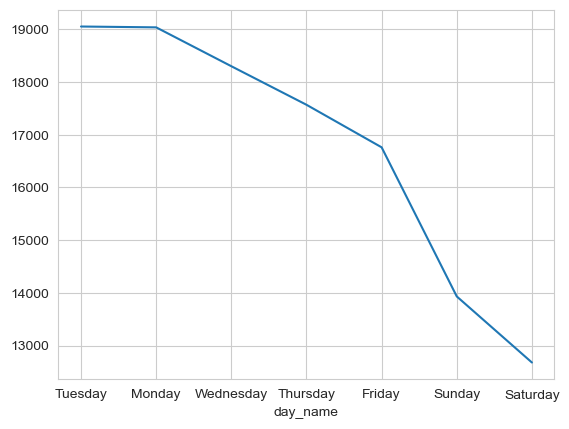

In [203]:
df_day_order.plot(kind='line')

#Conclusion
-Pada hari selasa user banyak melakukan pembelian produk
-Dan pada hari sabtu sangat sedikit sekali user yang membeli produk (terendah)